In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cancer_df = pd.read_csv(os.path.join("data.csv"))
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [3]:
cancer_df.loc[(cancer_df.diagnosis == 'B'),'diagnosis']='Benign'
cancer_df.loc[(cancer_df.diagnosis == 'M'),'diagnosis']='Malignant'

In [4]:
cancer_df.rename(columns = {'id':'Paitent ID', 'diagnosis':'Diagnosis'
                            , 'radius_mean':'Radius (Mean)', 'texture_mean':'Texture (Mean)', 'perimeter_mean':'Perimeter (Mean)'
                           , 'area_mean':'Area (Mean)', 'smoothness_mean':'Smoothness (Mean)', 'compactness_mean':'Compactness (Mean)', 'concavity_mean':'Concavity (Mean)', 'concave points_mean':'Concave Points (Mean)'
                           , 'symmetry_mean':'Symmetry (Mean)', 'fractal_dimension_mean':'Fractal Dimension (Mean)'
                            , 'radius_se':'Radius (Standard Error)', 'texture_se':'Texture (Standard Error)', 'perimeter_se':'Perimeter (Standard Error)'
                            , 'area_se':'Area (Standard Error)', 'smoothness_se':'Smoothness (Standard Error)', 'compactness_se':'Compactness (Standard Error)', 'concavity_se':'Concavity (Standard Error)', 'concave points_se':'Concave Points (Standard Error)'
                            , 'symmetry_se':'Symmetry (Standard Error)', 'fractal_dimension_se':'Fractal Dimension (Standard Error)'
                            , 'radius_worst':'Radius (Worst)', 'texture_worst':'Texture (Worst)', 'perimeter_worst':'Perimeter (Worst)'
                           , 'area_worst':'Area (Worst)', 'smoothness_worst':'Smoothness (Worst)', 'compactness_worst':'Compactness (Worst)', 'concavity_worst':'Concavity (Worst)', 'concave points_worst':'Concave Points (Worst)'
                           , 'symmetry_worst':'Symmetry (Worst)', 'fractal_dimension_worst':'Fractal Dimension (Worst)'
                           }, inplace = True) 


In [5]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [6]:
cancer_df.to_csv(r"C:\Users\Magrathea\Documents\GIT_Hub\Projects\Final-Project\Cancer_Data.csv")
                 

In [7]:
X = cancer_df.drop("Diagnosis", axis=1)
y = cancer_df["Diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


# Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
classifier.fit(X_train, y_train)

C:\Users\Magrathea\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.40375586854460094
Testing Data Score: 0.44755244755244755


In [12]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant']
First 10 Actual labels: ['Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign']


In [13]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Malignant,Malignant
1,Malignant,Malignant
2,Malignant,Benign
3,Malignant,Benign
4,Malignant,Benign
...,...,...
138,Malignant,Malignant
139,Malignant,Benign
140,Benign,Benign
141,Malignant,Benign


# KNN

In [14]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [14]:
y = cancer_df["Diagnosis"]

In [15]:
X_df = cancer_df.drop("Diagnosis", axis =1)
X = X_df.drop("Paitent ID", axis =1)

X.head()

,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),Fractal Dimension (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.916
k: 3, Train/Test Score: 0.958/0.923
k: 5, Train/Test Score: 0.944/0.930
k: 7, Train/Test Score: 0.944/0.916
k: 9, Train/Test Score: 0.944/0.916
k: 11, Train/Test Score: 0.946/0.923
k: 13, Train/Test Score: 0.944/0.923
k: 15, Train/Test Score: 0.937/0.930
k: 17, Train/Test Score: 0.937/0.930
k: 19, Train/Test Score: 0.937/0.930


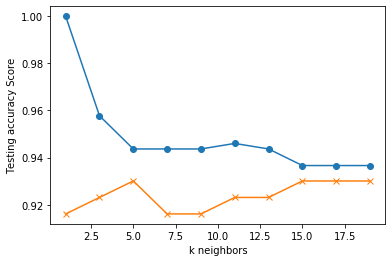

In [17]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.923


# Random Forrest

In [37]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [38]:
feature_names = X.columns
target_names = ["negative", "positive"]

In [39]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [40]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [41]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [42]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train_categorical)
clf.score(X_test, y_test_categorical)

0.9230769230769231

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train_categorical)
rf.score(X_test, y_test_categorical)

0.958041958041958

In [44]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15312667465468519, 'Concave Points (Worst)'),
 (0.1479748598750349, 'Perimeter (Worst)'),
 (0.12026465502396233, 'Radius (Worst)'),
 (0.11835143718180487, 'Area (Worst)'),
 (0.08297720087371702, 'Concave Points (Mean)'),
 (0.060099528128440244, 'Perimeter (Mean)'),
 (0.03702454177993685, 'Concavity (Mean)'),
 (0.036739949850905694, 'Radius (Mean)'),
 (0.03527325265250417, 'Area (Mean)'),
 (0.027694831055260116, 'Concavity (Worst)'),
 (0.026184308141644873, 'Area (Standard Error)'),
 (0.020906536663512915, 'Compactness (Worst)'),
 (0.013605004885376462, 'Texture (Mean)'),
 (0.013516804187162121, 'Smoothness (Worst)'),
 (0.011830053501529025, 'Perimeter (Standard Error)'),
 (0.011115112449965958, 'Texture (Worst)'),
 (0.010388074849254214, 'Symmetry (Worst)'),
 (0.010112755050202054, 'Compactness (Mean)'),
 (0.008193654468636364, 'Radius (Standard Error)'),
 (0.006618737928360616, 'Concave Points (Standard Error)'),
 (0.006358458357265047, 'Smoothness (Mean)'),
 (0.005648154707187333

In [45]:
#Build lists for mean and SEM Value for radius and permiter values
#Radius (Mean)
radius_means = cancer_df.loc[:, ['Radius (Mean)']]
radius_means = radius_means['Radius (Mean)']

#Perimeter (Worst)
perimeter_means = cancer_df.loc[:, ['Perimeter (Worst)']]
perimeter_means = perimeter_means['Perimeter (Worst)']


No handles with labels found to put in legend.


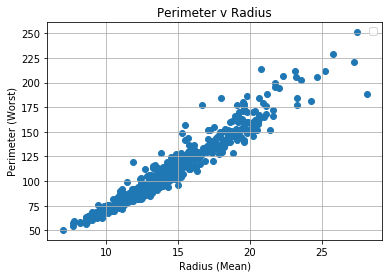

In [51]:
# Generate the Plot (with Error Bars)
#Min/Max values for volume to determine limits on plot chart
min_volume = cancer_df.min()['Radius (Mean)']
max_volume = cancer_df.max()['Radius (Mean)']
max_yvolume = cancer_df.max()['Perimeter (Worst)']

#create additional white space on plot chart
min_volume = min_volume - 1
max_volume = max_volume + 1
max_yvolume = max_yvolume + 2
#Limits, background grid, title, labels
plt.grid(True)

plt.ylabel("Perimeter (Worst)")
plt.xlabel("Radius (Mean)")
plt.title("Perimeter v Radius")
plt.scatter(radius_means, perimeter_means)
plt.legend(frameon=True)
plt.show()


# SVM

In [19]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [53]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.972


In [55]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.98        80
    positive       1.00      0.94      0.97        63

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# GridSearch

In [56]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [57]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [58]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

C:\Users\Magrathea\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.923, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.937, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.943, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.923, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.937, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.943, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.923, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.937, total=   0.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.943, total=   0.5s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   41.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [60]:
# List the best score
print(grid.best_score_)

0.9366197183098591


In [61]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [62]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.96      1.00      0.98        80
         red       1.00      0.95      0.98        63

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# NN

In [63]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [64]:
# Step 0: Reformat data
data = cancer_df.values
X = data[:, 2:35]
y = data[:, 1]

In [65]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [66]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [67]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [68]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [69]:
print(X_train.shape)

(426, 30)


In [70]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [72]:
from tensorflow.keras.layers import Dense
number_inputs = 30
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [73]:
number_classes = 2
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=number_classes, activation='softmax'))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 124       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
print(X_train_scaled.shape)
print(y_train_categorical.shape)

(426, 30)
(426, 2)


In [77]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Train on 426 samples
Epoch 1/1000
426/426 - 0s - loss: 0.7165 - accuracy: 0.3873
Epoch 2/1000
426/426 - 0s - loss: 0.6954 - accuracy: 0.5516
Epoch 3/1000
426/426 - 0s - loss: 0.6845 - accuracy: 0.6268
Epoch 4/1000
426/426 - 0s - loss: 0.6758 - accuracy: 0.6526
Epoch 5/1000
426/426 - 0s - loss: 0.6656 - accuracy: 0.6737
Epoch 6/1000
426/426 - 0s - loss: 0.6512 - accuracy: 0.7465
Epoch 7/1000
426/426 - 0s - loss: 0.6269 - accuracy: 0.8099
Epoch 8/1000
426/426 - 0s - loss: 0.5907 - accuracy: 0.8756
Epoch 9/1000
426/426 - 0s - loss: 0.5404 - accuracy: 0.9085
Epoch 10/1000
426/426 - 0s - loss: 0.4776 - accuracy: 0.9178
Epoch 11/1000
426/426 - 0s - loss: 0.4065 - accuracy: 0.9272
Epoch 12/1000
426/426 - 0s - loss: 0.3347 - accuracy: 0.9296
Epoch 13/1000
426/426 - 0s - loss: 0.2714 - accuracy: 0.9366
Epoch 14/1000
426/426 - 0s - loss: 0.2237 - accuracy: 0.9390
Epoch 15/1000
426/426 - 0s - loss: 0.1891 - accuracy: 0.9484
Epoch 16/1000
426/426 - 0s - loss: 0.1638 - accuracy: 0.9507
Epoch 17/100

Epoch 135/1000
426/426 - 0s - loss: 0.0237 - accuracy: 0.9930
Epoch 136/1000
426/426 - 0s - loss: 0.0235 - accuracy: 0.9930
Epoch 137/1000
426/426 - 0s - loss: 0.0234 - accuracy: 0.9930
Epoch 138/1000
426/426 - 0s - loss: 0.0232 - accuracy: 0.9930
Epoch 139/1000
426/426 - 0s - loss: 0.0231 - accuracy: 0.9930
Epoch 140/1000
426/426 - 0s - loss: 0.0230 - accuracy: 0.9930
Epoch 141/1000
426/426 - 0s - loss: 0.0229 - accuracy: 0.9930
Epoch 142/1000
426/426 - 0s - loss: 0.0227 - accuracy: 0.9930
Epoch 143/1000
426/426 - 0s - loss: 0.0226 - accuracy: 0.9930
Epoch 144/1000
426/426 - 0s - loss: 0.0225 - accuracy: 0.9930
Epoch 145/1000
426/426 - 0s - loss: 0.0224 - accuracy: 0.9930
Epoch 146/1000
426/426 - 0s - loss: 0.0223 - accuracy: 0.9930
Epoch 147/1000
426/426 - 0s - loss: 0.0224 - accuracy: 0.9930
Epoch 148/1000
426/426 - 0s - loss: 0.0220 - accuracy: 0.9930
Epoch 149/1000
426/426 - 0s - loss: 0.0219 - accuracy: 0.9930
Epoch 150/1000
426/426 - 0s - loss: 0.0218 - accuracy: 0.9930
Epoch 15

Epoch 268/1000
426/426 - 0s - loss: 0.0108 - accuracy: 0.9977
Epoch 269/1000
426/426 - 0s - loss: 0.0107 - accuracy: 0.9977
Epoch 270/1000
426/426 - 0s - loss: 0.0107 - accuracy: 0.9977
Epoch 271/1000
426/426 - 0s - loss: 0.0107 - accuracy: 0.9977
Epoch 272/1000
426/426 - 0s - loss: 0.0106 - accuracy: 0.9977
Epoch 273/1000
426/426 - 0s - loss: 0.0106 - accuracy: 0.9977
Epoch 274/1000
426/426 - 0s - loss: 0.0104 - accuracy: 0.9977
Epoch 275/1000
426/426 - 0s - loss: 0.0105 - accuracy: 0.9977
Epoch 276/1000
426/426 - 0s - loss: 0.0103 - accuracy: 0.9977
Epoch 277/1000
426/426 - 0s - loss: 0.0103 - accuracy: 0.9977
Epoch 278/1000
426/426 - 0s - loss: 0.0103 - accuracy: 0.9977
Epoch 279/1000
426/426 - 0s - loss: 0.0102 - accuracy: 0.9977
Epoch 280/1000
426/426 - 0s - loss: 0.0102 - accuracy: 0.9977
Epoch 281/1000
426/426 - 0s - loss: 0.0101 - accuracy: 0.9977
Epoch 282/1000
426/426 - 0s - loss: 0.0102 - accuracy: 0.9977
Epoch 283/1000
426/426 - 0s - loss: 0.0101 - accuracy: 0.9977
Epoch 28

Epoch 401/1000
426/426 - 0s - loss: 0.0064 - accuracy: 0.9977
Epoch 402/1000
426/426 - 0s - loss: 0.0063 - accuracy: 0.9977
Epoch 403/1000
426/426 - 0s - loss: 0.0062 - accuracy: 0.9977
Epoch 404/1000
426/426 - 0s - loss: 0.0062 - accuracy: 0.9977
Epoch 405/1000
426/426 - 0s - loss: 0.0062 - accuracy: 0.9977
Epoch 406/1000
426/426 - 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 407/1000
426/426 - 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 408/1000
426/426 - 0s - loss: 0.0062 - accuracy: 0.9977
Epoch 409/1000
426/426 - 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 410/1000
426/426 - 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 411/1000
426/426 - 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 412/1000
426/426 - 0s - loss: 0.0060 - accuracy: 0.9977
Epoch 413/1000
426/426 - 0s - loss: 0.0060 - accuracy: 0.9977
Epoch 414/1000
426/426 - 0s - loss: 0.0059 - accuracy: 0.9977
Epoch 415/1000
426/426 - 0s - loss: 0.0060 - accuracy: 0.9977
Epoch 416/1000
426/426 - 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 41

Epoch 534/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 535/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 536/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 537/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 538/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 539/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 540/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 541/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 542/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 543/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 544/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 545/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 546/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 547/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 548/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 549/1000
426/426 - 0s - loss: 0.0055 - accuracy: 0.9977
Epoch 55

Epoch 667/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 668/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 669/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 670/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 671/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 672/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 673/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 674/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 675/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 676/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 677/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 678/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 679/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 680/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 681/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 682/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 68

Epoch 800/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 801/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 802/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 803/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 804/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 805/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 806/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 807/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 808/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 809/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 810/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 811/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 812/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 813/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 814/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 815/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 81

Epoch 933/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 934/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 935/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 936/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 937/1000
426/426 - 0s - loss: 0.0054 - accuracy: 0.9977
Epoch 938/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 939/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 940/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 941/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 942/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 943/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 944/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 945/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 946/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 947/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 948/1000
426/426 - 0s - loss: 0.0053 - accuracy: 0.9977
Epoch 94

In [78]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.7703 - accuracy: 0.9580
Loss: 0.7703354717130279, Accuracy: 0.9580419659614563
